# Sentiment Analysis of Flysafe Airlines  Reviews

## EDA - EXPLORATORY DATA ANALYSIS 

#### Import necessary libraries

In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup

In [2]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [3]:

import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score



##### Loading & Reading the data into a Pandas DataFrame of the Company named "Flysafe Airlines" website revi

In [4]:
#importing the training data
imdb_data=pd.read_excel('Flysafe Airlines.xlsx')


### Explaining dataset like shape , strcture , size 

In [5]:

print(imdb_data.shape)
imdb_data.head(10)

(308384, 3)


,Unnamed: 0,comment,label
0,0,"Mohammad harun, he is an awesome guy very info...",Postive
1,1,"amazing guy gaurav was, so patience and kind. ...",Postive
2,2,Gaurav was very knowledgeable and very helpful...,Postive
3,3,I called them regarding my flight cancellation...,Postive
4,4,VERY GOOD SERVICE BY GAURAV LOHAT SERVED AS SO...,Postive
5,5,We have had very good experience with Flydealf...,Postive
6,6,I'd like to highly commend your staffs from he...,Postive
7,7,"Addicted to Trustpilot, has everything you nee...",Postive
8,8,I would like to whole heartedly thank Mr Moham...,Postive
9,9,"Hi Mohd, I wanted to thank Mohd what a amazing...",Postive


In [6]:
imdb_data.tail(10)

,Unnamed: 0,comment,label
308374,308374,The process of reviewing the flight informatio...,Postive
308375,308375,I would always purchase from JUST FLY great ...,Postive
308376,308376,I just found JustFly and it is great! Easier t...,Postive
308377,308377,Justfly.com offers great deals. The website is...,Postive
308378,308378,The experience on the website is easy and stra...,Postive
308379,308379,You have to double check price before place or...,Postive
308380,308380,My reserved flight was just as I expected. Th...,Postive
308381,308381,Quick easy and cheap.,Postive
308382,308382,Great experience & price,Postive
308383,308383,I found the website extremely helpful. I have ...,Postive


In [7]:
print(imdb_data.columns)

Index(['Unnamed: 0', 'comment', 'label'], dtype='object')


In [8]:
print(imdb_data['label'].value_counts())

Postive     271113
Negative     37271
Name: label, dtype: int64


In [9]:
imdb_data = imdb_data[['comment','label']]
print(imdb_data.shape)

(308384, 2)


In [10]:
sentiment_label = imdb_data.label.factorize()
sentiment_label

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 Index(['Postive', 'Negative'], dtype='object'))

In [11]:
#Summary of the dataset
imdb_data.describe()

,comment,label
count,308368,308384
unique,304133,2
top,Good service,Postive
freq,145,271113


In [12]:
#sentiment count
imdb_data['label'].value_counts()

Postive     271113
Negative     37271
Name: label, dtype: int64

## Training & Testing the Data 

In [13]:
#split the dataset  
#train dataset
train_comments=imdb_data.comment[:40000]
train_labels=imdb_data.label[:40000]
#test dataset
test_comments=imdb_data.comment[40000:]
test_labels=imdb_data.label[40000:]
print(train_labels.shape,train_labels.shape)
print(test_comments.shape,test_comments.shape)

(40000,) (40000,)
(268384,) (268384,)


# Text normalization 

In [14]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

## Removing html strips and noise text 

In [16]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on comment column
imdb_data['comment']=imdb_data['comment'].apply(denoise_text)

C:\Users\jassd\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [18]:
imdb_data['comment'] = imdb_data['comment'].astype(str)  # convert column to string
imdb_data['comment'] = imdb_data['comment'].apply(denoise_text)

### Removing special characters 

In [19]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on comment column
imdb_data['comment']=imdb_data['comment'].apply(remove_special_characters)

## Lower case 

In [23]:
# Initialize new list
words = []
# loop through list tokens and make lower case
tokenizer_sent = tokenizer.tokenize('comment')
for word in tokenizer_sent:
    words.append(word.lower())
    words[:9]

### Text stemming

In [21]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on comment column
imdb_data['comment']=imdb_data['comment'].apply(simple_stemmer)

### Removing stopwords 

In [24]:
sw_nltk = stopwords.words("english")
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [25]:
print(len(sw_nltk))

179


In [26]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on comment column
imdb_data['comment']=imdb_data['comment'].apply(remove_stopwords)

{'ll', 'am', "wouldn't", 'whom', 'over', 'are', 'those', 'me', 'they', "hasn't", 'in', "you'd", 'mustn', 'wasn', "hadn't", 'itself', 'which', 've', 'what', "haven't", 'won', 'out', 'yourselves', 'or', 'a', 'before', 'of', 'when', 'under', 'has', 'each', "you've", 'after', 'than', 'don', 'yours', 'and', 'my', 'did', 'same', "it's", 'yourself', 'shan', 'herself', 'needn', 'to', 'above', "shouldn't", 'off', 'his', "you'll", "that'll", 'was', 'being', 'once', 'her', 'should', 'didn', 'he', 'we', 'few', 'hadn', 'until', 'you', 'just', 'such', "couldn't", 't', 'o', 'where', 'with', 'she', 'ours', 'doesn', 'mightn', 'been', 'were', 'i', 'haven', 'so', 'ain', "won't", "isn't", 'why', 'other', 'ma', 'is', 'most', 'theirs', 'isn', 'this', 'both', 'will', 'hasn', 'themselves', 'from', 'himself', 'aren', 'them', "she's", 'its', 'further', 'during', 'our', "mightn't", 'ourselves', 'myself', 'their', 'between', 'd', 'up', 'it', 'do', 'for', 'while', 'no', 'that', 'if', 'not', 'couldn', 'who', 'y', '

In [27]:
#normalized train comments
norm_train_comments=imdb_data.comment[:40000]
norm_train_comments[0]

'mohammad harun awesom guy veri inform help help book flight india emerg situat finish formal realli thank hi team rock harun'

In [28]:
norm_test_comments=imdb_data.comment[40000:]
norm_test_comments[40001]

'use justfli im use pray trip east goe schedul'

# Bags of words model

### It is used to convert text documents to numerical vectors or bag of words. 

In [29]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train comments
cv_train_comments=cv.fit_transform(norm_train_comments)
#transformed test comments
cv_test_comments=cv.transform(norm_test_comments)

print('BOW_cv_train:',cv_train_comments.shape)
print('BOW_cv_test:',cv_test_comments.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (40000, 1192921)
BOW_cv_test: (268384, 1192921)


### Labeling the sentiment text

In [30]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(imdb_data['label'])
print(sentiment_data.shape)

(308384, 1)


In [31]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [1]]
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


## Modelling the dataset  

In [41]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_comments,train_labels)
print(lr_bow)

LogisticRegression(C=1, max_iter=500, random_state=42)


In [42]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_comments)
print(lr_bow_predict)

['Postive' 'Postive' 'Postive' ... 'Postive' 'Postive' 'Postive']


## Accuracy of model 

In [44]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_labels,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

lr_bow_score : 0.8991854954095624


In [45]:
#Classification report for bag of words 
lr_bow_report=classification_report(test_labels,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

              precision    recall  f1-score   support

    Positive       0.53      0.00      0.01     27065
    Negative       0.90      1.00      0.95    241319

    accuracy                           0.90    268384
   macro avg       0.71      0.50      0.48    268384
weighted avg       0.86      0.90      0.85    268384



### Analazing comments from customers 

In [55]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [56]:
from wordcloud import WordCloud

# Word cloud for positive review words

<function matplotlib.pyplot.show(close=None, block=None)>

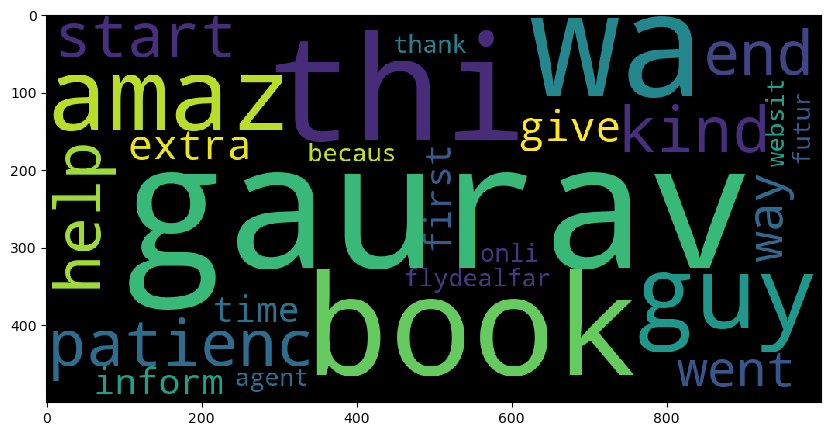

In [57]:
#word cloud for positive comment words
plt.figure(figsize=(10,10))
positive_text=norm_train_comments[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='none')
plt.show

## Word cloud for negative reviews

<function matplotlib.pyplot.show(close=None, block=None)>

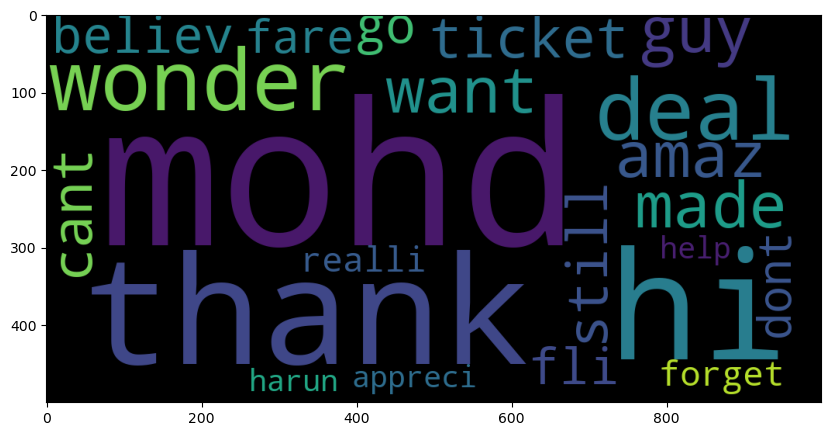

In [102]:
#Word cloud for negative reviews
plt.figure(figsize=(10,10))
negative_text=norm_train_comments[9]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='antialiased')
plt.show